test_structelemer

In [1]:
from os.path import join
from numpy import pi


from pyleecan.Classes.OPdq import OPdq
from pyleecan.definitions import DATA_DIR

from pyleecan.Classes.LamSlotMag import LamSlotMag
from pyleecan.Classes.SlotM11 import SlotM11
from pyleecan.Classes.MachineSIPMSM import MachineSIPMSM
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.StructElmer import StructElmer
from pyleecan.Classes.InputVoltage import InputVoltage
from pyleecan.Classes.Output import Output
from pyleecan.Functions.load import load


In [2]:
# get the machine
machine_1 = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
# mesh settings, original line label names have to be used (not the translated)
n1 = 3
n2 = 20

mesh_dict_1 = {
    "Magnet_0_Top": n2,
    "Magnet_0_Bottom": n2,
    "Magnet_0_Left": n1,
    "Magnet_0_Right": n1,
    "Magnet_1_Top": n2,
    "Magnet_1_Bottom": n2,
    "Magnet_1_Left": n1,
    "Magnet_1_Right": n1,
    "Hole_0_Top": 0,
    "Hole_0_Left": n1,
    "Hole_0_Right": n1,
    "Hole_1_Top": 0,
    "Hole_1_Left": n1,
    "Tangential_Bridge": 40,
    "Radial_Bridge": 40,
    "ROTOR_BORE_CURVE": 100,
    "Lamination_Rotor_Bore_Radius_Ext": 100,
}

In [3]:
class Test_StructElmer(object):
    def test_StructElmer_HoleM50(self):
        """Test StructElmer simulation with 2 magnets on HoleM50 rotor"""

        # copy the machine
        machine = machine_1.copy()

        # some modifications to geometry
        machine.rotor.hole[0].W2 = 1.0e-3

        # setup the simulation
        simu = Simu1(name="test_StructElmer_HoleM50", machine=machine)
        output = Output(simu=simu)
        output.path_result = save_path

        simu.struct = StructElmer()
        simu.struct.FEA_dict_enforced = mesh_dict_1
        simu.struct.is_get_mesh = True

        # set rotor speed and run simulation
        simu.input = InputVoltage(OP=OPdq(N0=10000))  # rpm
        simu.run()

        return output

In [4]:
save_path='D:\Temp\Test_pyleecan'

In [5]:
obj = Test_StructElmer()

In [6]:
out = obj.test_StructElmer_HoleM50()

[02:07:19] Starting running simulation test_StructElmer_HoleM50 (machine=Toyota_Prius)
Add physical group Lamination_0_Body with surface [7]
[(2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]
Add physical group Magnet_0_Body with surface [3]
Add physical group Magnet_1_Body with surface [5]
[(2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]
[02:07:19] Calling ElmerGrid: "C:\Program Files\Elmer 9.0-Release\bin\ElmerGrid.exe"

Starting program Elmergrid
Elmergrid reading in-line arguments
A secondary input file magnets.msh will be loaded.
The meshes will be united.
Lower dimensional boundaries will be removed
Materials and boundaries will be renumbered
Nodes that do not appear in any element will be removed
Output will be saved to file Mesh.

Elmergrid loading data:
-----------------------
Format chosen using the first line: $MeshFormat
Gmsh version is 4.1
Loading mesh in Gmsh format 4.1 from file lamination.msh
Reading 31 entities in 0D
Reading 30 entities in 1D
Reading 7 entities i

   gcr:   170  0.2967E-02  0.7927E-03
   gcr:   180  0.2525E-02  0.6834E-05
   gcr:   190  0.2494E-02 -0.2406E-06
   gcr:   200  0.2242E-02 -0.1803E-06
   gcr:   210  0.2076E-02  0.2952E-04
   gcr:   220  0.1876E-02  0.4492E-05
   gcr:   230  0.1876E-02 -0.1314E-06
   gcr:   240  0.1820E-02 -0.1558E-05
   gcr:   250  0.1729E-02  0.1238E-03
   gcr:   260  0.1324E-02 -0.5330E-07
   gcr:   270  0.1087E-02 -0.3209E-07
   gcr:   280  0.9697E-03  0.1372E-03
   gcr:   290  0.9396E-03  0.1839E-07
   gcr:   300  0.8835E-03  0.1730E-06
   gcr:   310  0.8406E-03  0.2292E-03
   gcr:   320  0.8388E-03  0.3269E-07
   gcr:   330  0.7433E-03  0.3675E-06
   gcr:   340  0.5369E-03  0.2591E-04
   gcr:   350  0.5158E-03 -0.1050E-07
   gcr:   360  0.4093E-03  0.3473E-04
   gcr:   370  0.4069E-03  0.4436E-08
   gcr:   380  0.4056E-03 -0.7535E-06
   gcr:   390  0.3897E-03  0.1515E-07
   gcr:   400  0.3800E-03 -0.1694E-08
ComputeChange: NS (ITER=1) (NRM,RELC): (  2397093.9      2.0000000     ) :: linear elast

   gcr:   260  0.2578E-04 -0.3587E-07
   gcr:   270  0.2504E-04  0.4149E-07
   gcr:   280  0.2503E-04 -0.4930E-06
   gcr:   290  0.2399E-04 -0.5256E-07
   gcr:   300  0.2374E-04 -0.1099E-07
   gcr:   310  0.2332E-04  0.7292E-06
   gcr:   320  0.2180E-04 -0.1679E-07
   gcr:   330  0.2019E-04 -0.1345E-07
   gcr:   340  0.1976E-04  0.3642E-05
   gcr:   350  0.1814E-04 -0.3258E-07
   gcr:   360  0.1648E-04  0.4380E-08
   gcr:   370  0.1523E-04  0.5247E-07
   gcr:   380  0.1514E-04  0.2705E-07
   gcr:   390  0.1341E-04  0.4429E-05
   gcr:   400  0.1341E-04 -0.1878E-07
ComputeChange: NS (ITER=11) (NRM,RELC): ( 0.34083553E+09 0.36342710E-01 ) :: linear elasticity
ElasticSolver: -------------------------------------
ElasticSolver: ELASTICITY ITERATION 12
ElasticSolver: -------------------------------------
   gcr:    10  0.9051E-06  0.1118E-05
   gcr:    20  0.1368E-08  0.9586E-08
ComputeChange: NS (ITER=12) (NRM,RELC): ( 0.34070581E+09 0.38067814E-03 ) :: linear elasticity
ElasticSolver: ----

In [13]:
out.struct.meshsolution.plot_mesh()

None


get_meshsolution

In [25]:
import os
import numpy as np


from definitions import MAIN_DIR

from .Classes.MeshMat import MeshMat

from .Classes.CellMat import CellMat
from .Classes.NodeMat import NodeMat
from .Classes.RefTriangle3 import RefTriangle3
from .Classes.FPGNTri import FPGNTri
from .Classes.ScalarProductL2 import ScalarProductL2

from os.path import join

from .Functions.FEMM import FEMM_GROUPS

ImportError: attempted relative import with no known parent package

Enter the number of stories: 3
Enter the k1: 2
Enter the k2: 2
Enter the k3: 3
Enter the m1: 5
Enter the m2: 1
Enter the m3: 23
natural frequencies: [0.17562002 0.80231483 2.29257133]
periods: [35.77715834  7.8313214   2.74067168]
MODAL MATRIX: 
[[  0.39707943 -10.07122675   3.52748065]
 [  0.76354166  -3.93510301 -39.29510532]
 [  1.           1.           1.        ]]


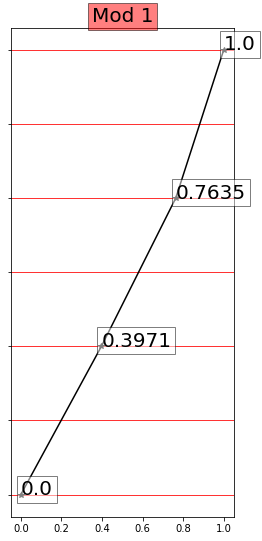

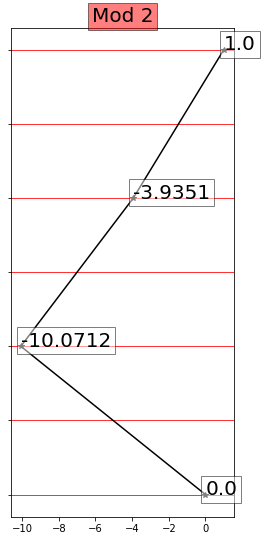

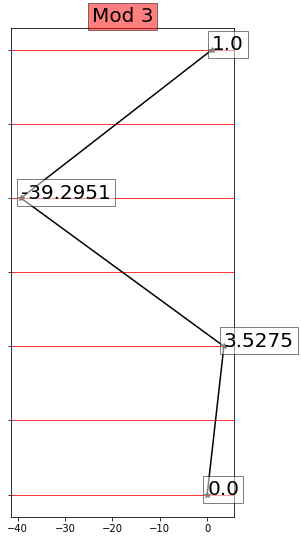

In [14]:
import numpy as np
from scipy.linalg import eigh
from matplotlib import pyplot as plt

# enter number of stories
story = int(input("Enter the number of stories: "))

# enter the story stiffnesses
k_stories = []
for item in range(1,story+1):
  k_ = float(input(f"Enter the k{item}: "))
  k_stories.append(k_)

#enter the story masses
m_stories = []
for item in range(1,story+1):
  m_ = float(input(f"Enter the m{item}: "))
  m_stories.append(m_)

# creation of mass matrix of the system
I = np.identity(story)
M_system = I * m_stories

#creation of stiffness matrix of the system
K_system = np.zeros((story,story))
for i in range(story-1):
    for j in range(story):
        if i == j : 
            K_system[i,j]= k_stories[i] + k_stories[i+1]
        elif i - j == 1 :
            K_system[i,j]= -1* k_stories[i]
        elif j-i == 1:
            K_system[i,j]= -1* k_stories[j]                
        else: 
            K_system[i,j] = 0
            
K_system[story-1,story-1] = k_stories[-1]
K_system[story-1,story-2] = -1*k_stories[-1]


# calculation of eigenvalues and eigenvectors;
evals, evecs = eigh(K_system,M_system)

# calculation of natural frequencies and periods
frequencies = np.sqrt(evals)
periods = 2*np.pi/frequencies
print(f"natural frequencies: {frequencies}")
print(50*"=")
print(f"periods: {periods}")
print(50*"=")

# determination of the modal matrix
mods = evecs.copy()
for j in range(story):
  mods[0::,j] = evecs[0::,j]/evecs[-1,j]
print(f"MODAL MATRIX: \n{mods}")
print(50*"=")

# Plotting of the mode shapes
  # arrangement for modal matrix to plot
mod_g = np.zeros((story+1,story))
mod_g[1::,0::] = mods
mods_list = {}
for item in range(1,story+1):
  mods_list[item] = mod_g[0::,item-1]

  #Plotting
for item in range(1,story+1):
  plt.figure(figsize=(4,9))
  plt.grid(color= "r", axis="y")
  plt.plot(mods_list[item],range(0,story+1,1),"k*-")
  
  ax = plt.gca()
  ax.axes.yaxis.set_ticklabels([])
  
  for a,b in zip(mods_list[item], range(0,story+1,1)): 
    plt.text(a, b, str(np.around(a,4)), fontsize=20,bbox=dict(facecolor='w', alpha=0.5))
  
  plt.title(f'Mod {item}', fontsize=20, bbox=dict(facecolor='r', alpha=0.50))
  plt.show()